# Project Background:

#### Companies often receive thousands of resumes for each job posting and employ dedicated screening officers to screen qualified candidates.

#### Hiring the right talent is a challenge for all businesses. This challenge is magnified by the high volume of applicants if the business is labour-intensive, growing, and facing high attrition rates.

#### IT departments are short of growing markets. In a typical service organization, professionals with a variety of technical skills and business domain expertise are hired and assigned to projects to resolve customer issues. This task of selecting the best talent among many others is known as Resume Screening.

<img src="giphy.gif">

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

import nltk
# nltk.download('wordnet')
# nltk.download('punkt')
# nltk.download('stopwords')

from nltk import bigrams
from nltk.stem import WordNetLemmatizer
from nltk import word_tokenize

import docx2txt
import os

from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer, TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity as cos_sim

In [2]:
df_resume = pd.read_csv('resume_dataset.csv')

# Objective 1: Explore Data, Data Cleaning & Pre-processing

## Read Dataset to DataFrame

In [3]:
# jd_df = pd.read_csv('jd_data.csv', encoding='cp1252')
# jd_df.rename(columns = {'JD':'Resume'}, inplace=True)

## Exploratory Data Visualization

### Dataset Size

In [4]:
df_resume

,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab..."
...,...,...
957,Testing,Computer Skills: â¢ Proficient in MS office (...
958,Testing,â Willingness to accept the challenges. â ...
959,Testing,"PERSONAL SKILLS â¢ Quick learner, â¢ Eagerne..."
960,Testing,COMPUTER SKILLS & SOFTWARE KNOWLEDGE MS-Power ...


In [5]:
df_resume.shape

(962, 2)

In [6]:
df_resume.sample(5)

,Category,Resume
864,Blockchain,"KEY SKILLS: Programing languages: C, C++, Pyth..."
934,Testing,â¢ Good logical and analytical skills â¢ Pos...
863,Blockchain,Skills Strong CS fundamentals and problem solv...
722,Database,TECHNICAL SKILLS Operating Systems MS Windows ...
436,SAP Developer,Education Details \r\n\r\nSAP Technical Archit...


### Distribution of Job Categories

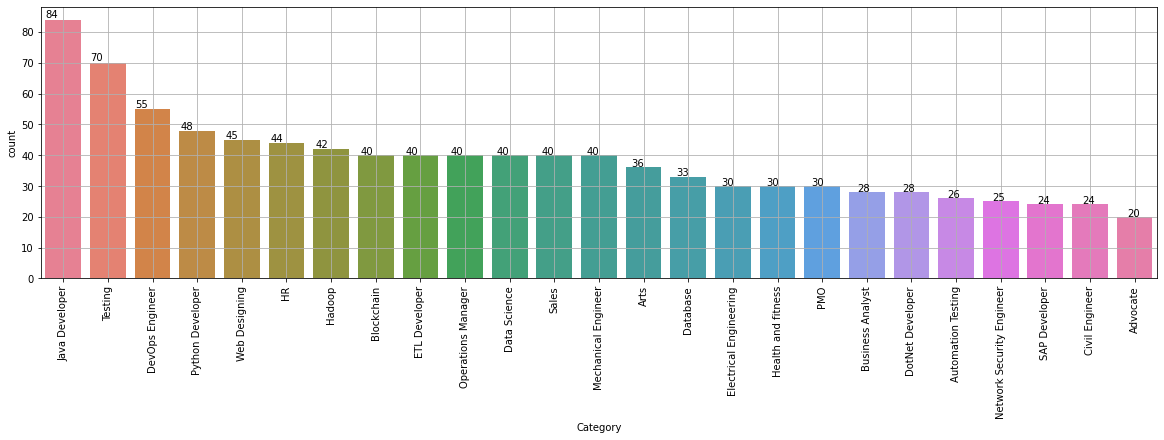

In [7]:
plt.figure(figsize=(20,5))
plt.xticks(rotation=90)
ax=sns.countplot(x="Category", data=df_resume, order=df_resume['Category'].value_counts().index, palette="husl")
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
plt.grid()

## Data Cleaning

### Removed Unusual Characters using Regular Expression (Regex)

In [8]:
def unusual_text_remover(text):
    text = re.sub('â\x80¢Â', ' ', text)
    text = re.sub('â\x9c¶', ' ', text)
    text = re.sub('Ã¼Â', ' ', text)
    text = re.sub('Â', '', text)
    text = re.sub('Ã¼', '', text)
    text = re.sub('ï', '', text)
    text = re.sub('â', '', text)
    text = (re.sub('[\W]+', ' ', text.lower()))
    return text

In [9]:
usual_text = df_resume['Resume'].apply(unusual_text_remover)

In [10]:
df_resume['Processed_Resume'] = df_resume['Resume'].apply(unusual_text_remover)

## Data Preprocessing

### Convert root word using Lemmatization

In [11]:
def lemmatization(text):
    lemmatizer = WordNetLemmatizer()
    word_list = word_tokenize(text)
    output = ' '.join([lemmatizer.lemmatize(word) for word in word_list])
    return output

In [12]:
lemmatized_text = usual_text.apply(lemmatization)

In [13]:
df_resume['Processed_Resume'] = df_resume['Processed_Resume'].apply(lemmatization)

### Resume before data cleaning and preprocessing (in-progress)

In [14]:
df_resume.iloc[18,1]

'Personal Skills â\x9e¢ Ability to quickly grasp technical aspects and willingness to learn â\x9e¢ High energy levels & Result oriented. Education Details \r\nJanuary 2018 Master of Engineering Computer Technology & Application Bhopal, Madhya Pradesh Truba Institute of Engineering & Information Technology\r\nJanuary 2010 B.E. computer science Bhopal, Madhya Pradesh RKDF Institute of Science and Technology College of Engineering\r\nJanuary 2006 Polytechnic Information Technology Vidisha, Madhya Pradesh SATI Engineering College in Vidisha\r\nJanuary 2003 M.tech Thesis Detail  BMCH School in Ganj basoda\r\nData science \r\n\r\nI have six month experience in Data Science. Key Skills: - Experience in Machine Learning, Deep Leaning, NLP, Python, SQL, Web Scraping Good knowledge in computer subjects and ability to update\r\nSkill Details \r\nExperience in Machine Learning, Deep Learning, NLP, Python, SQL, Web Crawling, HTML,CSS.- Exprience - Less than 1 year monthsCompany Details \r\ncompany 

### Resume after data cleaning 

In [15]:
usual_text[18]

'personal skills ability to quickly grasp technical aspects and willingness to learn high energy levels result oriented education details january 2018 master of engineering computer technology application bhopal madhya pradesh truba institute of engineering information technology january 2010 b e computer science bhopal madhya pradesh rkdf institute of science and technology college of engineering january 2006 polytechnic information technology vidisha madhya pradesh sati engineering college in vidisha january 2003 m tech thesis detail bmch school in ganj basoda data science i have six month experience in data science key skills experience in machine learning deep leaning nlp python sql web scraping good knowledge in computer subjects and ability to update skill details experience in machine learning deep learning nlp python sql web crawling html css exprience less than 1 year monthscompany details company rnt ai technology solution description text classification using machine learnin

### Resume after data cleaning and preprocessing (in-progress)

In [16]:
lemmatized_text[18]

'personal skill ability to quickly grasp technical aspect and willingness to learn high energy level result oriented education detail january 2018 master of engineering computer technology application bhopal madhya pradesh truba institute of engineering information technology january 2010 b e computer science bhopal madhya pradesh rkdf institute of science and technology college of engineering january 2006 polytechnic information technology vidisha madhya pradesh sati engineering college in vidisha january 2003 m tech thesis detail bmch school in ganj basoda data science i have six month experience in data science key skill experience in machine learning deep leaning nlp python sql web scraping good knowledge in computer subject and ability to update skill detail experience in machine learning deep learning nlp python sql web crawling html cs exprience le than 1 year monthscompany detail company rnt ai technology solution description text classification using machine learning algorithm

## Filter Resume based on keywords and Job Title

In [17]:
# df_filtered = pd.DataFrame()  

# key_words = ['12 month', '1 year', 'python']
# role = 'Data Science'

# for idx in range(df_resume.shape[0]):
#     sentence = df_resume['Processed_Resume'][idx]  
#     twogram = bigrams(sentence.split())
#     for gram in twogram:
#         try:
#             if (gram[0] + ' ' + gram[1]) in key_words and df_resume.iloc[[idx]]['Category'].values[0] == role:
#                     df_filtered =  df_filtered.append(df_resume.iloc[[idx]])
        
#         except KeyError:
#             df_filtered =  df_filtered.append(df_resume.iloc[[idx]])
             
# df_filtered.drop_duplicates(subset=['Processed_Resume'], inplace=True)
      

### Write Dataframe to csv file

In [18]:
# df_filtered.to_csv('filtered_resume.csv')

# Objective 2: Classify Job Category from Incoming Resume

In [19]:
from nltk.corpus import stopwords

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import accuracy_score
from sklearn import metrics

from wordcloud import WordCloud

## Data Preprocessing 

### Remove Stop-words in Resume

In [20]:
stop = stopwords.words('english')

In [21]:
total_words =[]
sentences = []
for text in df_resume['Processed_Resume']:
    word_list = word_tokenize(text)
    para = [word for word in word_list if word not in stop]
    sentences.append(' '.join(para))
    total_words = total_words + para


In [22]:
job_category_list = df_resume['Category'].values.tolist()

In [23]:
cleaned_resume_df = pd.DataFrame(list(zip(job_category_list, sentences)), columns=['Job_Category', 'Processed_Resume'])
cleaned_resume_df

,Job_Category,Processed_Resume
0,Data Science,skill programming language python panda numpy ...
1,Data Science,education detail may 2013 may 2017 b e uit rgp...
2,Data Science,area interest deep learning control system des...
3,Data Science,skill r python sap hana tableau sap hana sql s...
4,Data Science,education detail mca ymcaust faridabad haryana...
...,...,...
957,Testing,computer skill proficient office word basic ex...
958,Testing,willingness accept challenge positive thinking...
959,Testing,personal skill quick learner eagerness learn n...
960,Testing,computer skill software knowledge power point ...


In [24]:
cleaned_resume_df.to_csv('processed_resume.csv')

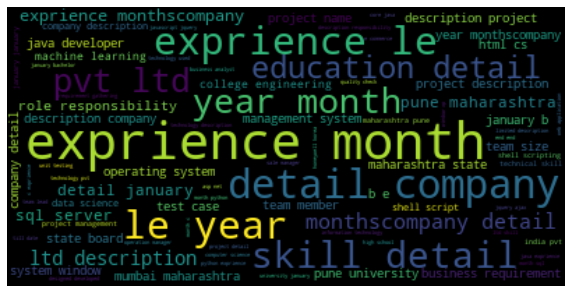

In [25]:
wc = WordCloud().generate(' '.join(total_words))
plt.figure(figsize=(10,10))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()      

### Transform words into feature vectors

In [26]:
count = CountVectorizer()

In [27]:
tfidf = TfidfTransformer(use_idf=True, norm = 'l2', smooth_idf =True)

In [28]:
tfidf.fit_transform(count.fit_transform(sentences))

<962x6675 sparse matrix of type '<class 'numpy.float64'>'
	with 162281 stored elements in Compressed Sparse Row format>

In [29]:
np.set_printoptions(precision= 2)
a = tfidf.fit_transform(count.fit_transform(sentences)).toarray()

### Train the model

In [30]:
y = df_resume['Category']
x = a

In [31]:
print(y.shape)
print(x.shape)

(962,)
(962, 6675)


In [32]:
X_train,X_test,y_train,y_test = train_test_split(x, y,random_state=42, test_size=0.3,
                                                 shuffle=True, stratify=y)

In [33]:
# Create object clf from class OneVsRestClassifier and KNeighborsClassifier
clf = OneVsRestClassifier(KNeighborsClassifier())
# Input training sets into the object (model)
clf.fit(X_train, y_train)
# Predict target variable by using test set on the trained model
prediction = clf.predict(X_test)

In [34]:
print(round(clf.score(X_train, y_train),3))
print(round(clf.score(X_test, y_test),3))

0.987
0.976


In [35]:
print(f'{clf} \n')
print(metrics.classification_report(y_test, prediction))

OneVsRestClassifier(estimator=KNeighborsClassifier()) 

                           precision    recall  f1-score   support

                 Advocate       1.00      0.83      0.91         6
                     Arts       1.00      1.00      1.00        11
       Automation Testing       0.88      0.88      0.88         8
               Blockchain       1.00      1.00      1.00        12
         Business Analyst       1.00      1.00      1.00         8
           Civil Engineer       1.00      1.00      1.00         7
             Data Science       0.83      0.83      0.83        12
                 Database       1.00      1.00      1.00        10
          DevOps Engineer       1.00      0.94      0.97        17
         DotNet Developer       1.00      1.00      1.00         8
            ETL Developer       1.00      1.00      1.00        12
   Electrical Engineering       0.90      1.00      0.95         9
                       HR       0.93      1.00      0.96        13
     

# Objective 3: Filter Resume based on Job Description

## Concatenate new resumes into resume dataset

In [36]:
cleaned_resume_df = pd.read_csv('processed_resume.csv')

In [37]:
doc_list = [x for x in os.listdir('./resumes') if x.endswith(".docx")]
print(doc_list)

for doc in doc_list:

        resume = docx2txt.process(f'./resumes/{doc}')
        resume = pd.DataFrame({'Processed_Resume': resume}, index=[1])
        cleaned_resume_df = pd.concat([cleaned_resume_df, resume], ignore_index=True)
       

['ChenMeiMei.docx', 'Resume - Xisi.docx', 'Resume - YangGuiFei.docx', 'Resume - ZhongWuYan.docx']


In [60]:
cleaned_resume_df

,Unnamed: 0,Job_Category,Processed_Resume
0,0.0,Data Science,skill programming language python panda numpy ...
1,1.0,Data Science,education detail may 2013 may 2017 b e uit rgp...
2,2.0,Data Science,area interest deep learning control system des...
3,3.0,Data Science,skill r python sap hana tableau sap hana sql s...
4,4.0,Data Science,education detail mca ymcaust faridabad haryana...
...,...,...,...
961,961.0,Testing,skill set window xp 7 8 8 1 10 database mysql ...
962,NaN,NaN,candidate detail name chen mei mei notice peri...
963,NaN,NaN,candidate detail name xisi notice period avail...
964,NaN,NaN,yang gui fei 101 ang mo kio avenue 1 02 04 sin...


In [61]:
newly_added_idx = cleaned_resume_df.index[cleaned_resume_df['Job_Category'].isnull()].tolist()
print(newly_added_idx)
cleaned_resume_df['Processed_Resume'][newly_added_idx]

[962, 963, 964, 965]


962    candidate detail name chen mei mei notice peri...
963    candidate detail name xisi notice period avail...
964    yang gui fei 101 ang mo kio avenue 1 02 04 sin...
965    position business analyst personal information...
Name: Processed_Resume, dtype: object

In [62]:
target_idx = df_resume.index[df_resume['Category'] == 'Business Analyst'].tolist()
print(target_idx)

[403, 404, 405, 406, 407, 408, 409, 410, 411, 412, 413, 414, 415, 416, 417, 418, 419, 420, 421, 422, 423, 424, 425, 426, 427, 428, 429, 430]


In [82]:
jd = docx2txt.process('./Job_description/REC_Business Analyst.docx')

In [83]:
jd

"IT Business Analyst\n\nREC Solar Pte Ltd\n\nTuas\n\n\n\nJob Highlights\n\nRenewable Energy Industry\n\nFree Company Transport Islandwide\n\nJob Description\n\nThe BA Analyst is the primary contact in REC IT for Finance & Project System functional areas. This person is responsible to provide solutions for business needs & support the day-to-day operations; by ensuring business strategy and operational technology needs are shaped and captured appropriately within the enterprise. Then transforming that area’s strategic demands into a feasible set of projects, against resistance to maintain the status quo.\n\nA successful BA Analyst must have at least 3 years SAP FICO experience in implementation project or support role.\n\nESSENTIAL DUTIES AND RESPONSIBILITIES:\n\nBUSINESS ANALYSIS & SUPPORT\n\n• Liaise with key users and Business Process Owners (BPO) to identify pain points and problem areas that require IT solution, then capture specific requirements, propose cost effective solution an

### Data Clean & Pre-process Added Resumes

In [65]:
cleaned_resume_df['Processed_Resume'][newly_added_idx] = cleaned_resume_df['Processed_Resume'][newly_added_idx].apply(unusual_text_remover)
cleaned_resume_df['Processed_Resume'][newly_added_idx] = cleaned_resume_df['Processed_Resume'][newly_added_idx].apply(lemmatization)

C:\Users\khchu\AppData\Local\Temp/ipykernel_22372/3868876344.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_resume_df['Processed_Resume'][newly_added_idx] = cleaned_resume_df['Processed_Resume'][newly_added_idx].apply(unusual_text_remover)
C:\Users\khchu\AppData\Local\Temp/ipykernel_22372/3868876344.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_resume_df['Processed_Resume'][newly_added_idx] = cleaned_resume_df['Processed_Resume'][newly_added_idx].apply(lemmatization)


In [66]:
cleaned_resume_df['Processed_Resume'][newly_added_idx]

962    candidate detail name chen mei mei notice peri...
963    candidate detail name xisi notice period avail...
964    yang gui fei 101 ang mo kio avenue 1 02 04 sin...
965    position business analyst personal information...
Name: Processed_Resume, dtype: object

### Data Clean & Pre-process Job Description

In [67]:
def stop_words(text):
    sentences = []
    word_list = word_tokenize(text)
    para = [word for word in word_list if word not in stop]
    sentences.append(' '.join(para))
    return sentences

In [84]:
print(f'The word count before Data Cleaning is: {len(jd)}')
jd_cleaned = unusual_text_remover(jd)
print(f'The word count after Data Cleaning is: {len(jd_cleaned)}')
jd_cleaned = lemmatization(jd_cleaned)
print(f'The word count after lemmatization is: {len(jd_cleaned)}')
jd_cleaned = stop_words(jd_cleaned)
print(f'The word count after stop-word processing is: {len(jd_cleaned[0])}')

The word count before Data Cleaning is: 5260
The word count after Data Cleaning is: 5000
The word count after lemmatization is: 4895
The word count after stop-word processing is: 4182


In [47]:
# doc_score_dict = {}
# score_list = []
# count = CountVectorizer()
# for idx in start_idx:
#     text = [sentences[idx], jd_cleanedd[0]]
#     count_matrix = count.fit_transform(text)
#     score_list.append(cos_sim(count_matrix)[0][1])
    


In [69]:
len(target_idx)

28

In [85]:
jd_cleaned[0]

'business analyst rec solar pte ltd tuas job highlight renewable energy industry free company transport islandwide job description ba analyst primary contact rec finance project system functional area person responsible provide solution business need support day day operation ensuring business strategy operational technology need shaped captured appropriately within enterprise transforming area strategic demand feasible set project resistance maintain status quo successful ba analyst must least 3 year sap fico experience implementation project support role essential duty responsibility business analysis support liaise key user business process owner bpo identify pain point problem area require solution capture specific requirement propose cost effective solution implement support challenge proposal line roi ensure project change status quo deliver benefit prior entering design development phase responsible managing project liaising external solution provider deliver solution accordance

In [88]:
doc_score_dict = {}
score_list = []
tfidf_vect = TfidfVectorizer()
for idx in target_idx:
    text = [ cleaned_resume_df['Processed_Resume'][idx], jd_cleaned[0]]
    count_matrix = tfidf_vect.fit_transform(text)
    score_list.append(cos_sim(count_matrix)[0][1])

In [50]:
# doc_score_dict = {}
# score_list = []
# tfidf_vect = TfidfVectorizer()
# for idx in target_idx:
#     text = [sentences[idx], jd_cleanedd[0]]
#     count_matrix = tfidf_vect.fit_transform(text)
#     score_list.append(cos_sim(count_matrix)[0][1])

NameError: name 'jd_cleanedd' is not defined

In [89]:
score_list

[0.2514837149129732,
 0.2306041893488001,
 0.2845115225687753,
 0.3394261643001139,
 0.1538982790745994,
 0.12333430581073014,
 0.2845115225687753,
 0.3394261643001139,
 0.1538982790745994,
 0.12333430581073014,
 0.2845115225687753,
 0.3394261643001139,
 0.1538982790745994,
 0.12333430581073014,
 0.2514837149129732,
 0.2306041893488001,
 0.2845115225687753,
 0.3394261643001139,
 0.1538982790745994,
 0.12333430581073014,
 0.2845115225687753,
 0.3394261643001139,
 0.1538982790745994,
 0.12333430581073014,
 0.2845115225687753,
 0.3394261643001139,
 0.1538982790745994,
 0.12333430581073014]

In [91]:
doc_score_dict = { idx : round(score_list[idx], 3) for idx in range(len(score_list))}

In [92]:
len(doc_score_dict)

28

In [93]:
def rank_score(dict):
    rank = int(round(len(dict) * 0.2 , 0))
    sorted_dict = sorted(dict, key=dict.get, reverse=True)
    for val in sorted_dict[:rank]:
        print(f'{val} : {dict[val]}') 

In [94]:
rank_score(doc_score_dict)

3 : 0.339
7 : 0.339
11 : 0.339
17 : 0.339
21 : 0.339
25 : 0.339
